# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Danny Budiman
- **Email:** Danny.Budiman@gmail.com
- **ID Dicoding:** Danny.Budiman@gmail.com

## Menentukan Pertanyaan Bisnis

- Bagaimana perusahaan dapat mengidentifikasi jam sibuk secara lebih akurat untuk mengoptimalkan strategi harga?
- Bagaimana perusahaan dapat memprediksi permintaan sewa sepeda berdasarkan data musiman?

## Import Semua Packages/Library yang Digunakan

In [1]:
#import semua library yg dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


## Data Wrangling

### Gathering Data

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Provide the path to the files in Google Drive
hourly_data_path = '/content/drive/My Drive/Colab/hour.csv'
daily_data_path = '/content/drive/My Drive/Colab/day.csv'

# Load the datasets
hourly_df = pd.read_csv(hourly_data_path)
daily_df = pd.read_csv(daily_data_path)

# Display the first few rows of the datasets
print(hourly_df.head())
print("")
print(daily_df.head())
print("")


Mounted at /content/drive
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  

**Insight:**
- Hourly Data (hour.csv): Memberikan detil bike rental berdasarkan dengan waktu-waktu tertentu tiap harinya. Bisa digunakan untuk mencari trend.
- Daily Data (day.csv): Fokus untuk trend yang lebih umum seperti musiman, dll.
- Analisis bisa di explor dengan melihat trend temporal, pengaruh musim, pengaruh pada waktu-waktu tertentu

### Assessing Data

In [3]:
# Import library yang diperlukan
import pandas as pd
import numpy as np

# 1. Mengecek Data Null
print("== Mengecek Data Null ==")
print(hourly_df.isnull().sum())
print(daily_df.isnull().sum())

# 2. Mengecek Duplikasi
print("\n== Mengecek Duplikasi ==")
print("Duplikasi pada hourly_df:", hourly_df.duplicated().sum())
print("Duplikasi pada daily_df:", daily_df.duplicated().sum())

# 3. Mengecek Keakuratan Data (Contoh validasi kolom tertentu)
print("\n== Mengecek Keakuratan Data ==")
# Validasi rentang nilai kolom 'temp' dan 'atemp'
print("Temperatur di hourly_df berada di rentang 0 - 1:",
      hourly_df['temp'].between(0, 1).all())
print("Temperatur dirasakan di hourly_df berada di rentang 0 - 1:",
      hourly_df['atemp'].between(0, 1).all())

# 4. Mengecek Konsistensi Data
print("\n== Mengecek Konsistensi Data ==")
# Contoh: Konsistensi antara total count dengan jumlah casual dan registered
hourly_df['valid_cnt'] = hourly_df['casual'] + hourly_df['registered']
inconsistent = hourly_df[hourly_df['valid_cnt'] != hourly_df['cnt']]
print(f"Jumlah data tidak konsisten di hourly_df: {len(inconsistent)}")

# 5. Mengecek Outlier (Menggunakan IQR)
print("\n== Mengecek Outlier ==")
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Contoh: Deteksi outlier pada kolom 'cnt' (jumlah sepeda)
outliers = detect_outliers(hourly_df, 'cnt')
print(f"Jumlah outlier pada kolom 'cnt' di hourly_df: {len(outliers)}")


== Mengecek Data Null ==
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

== Mengecek Duplikasi ==
Duplikasi pada hourly_df: 0
Duplikasi pada daily_df: 0

== Mengecek Keakuratan Data ==
Temperatur di hourly_df berada di rentang 0 - 1: True
Temperatur dirasakan di hourly_df berada di rentang 0 - 1: True

== Mengecek Konsistensi Data ==
Jumlah data tidak konsisten di hourly_df: 0

== Mengecek Outlier ==
Jumlah outlier pada kolom 'cnt' di hourly_df: 505


**Insight:**
- Data terlihat bersih dan tidak ada value yang hilang.
- Dataset terlihat lengkap dan tidak perlu menangani data kosong.

### Cleaning Data

In [10]:
import pandas as pd

# Konversi kolom date ke datetime
hourly_df['dteday'] = pd.to_datetime(hourly_df['dteday'])
daily_df['dteday'] = pd.to_datetime(daily_df['dteday'])

# Mapping label musim
season_labels = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}


In [ ]:
# Analisa statistik dasar data
print(hourly_df.describe())
print("")



# Menghitung sewa sepeda berdasarkan musim
rentals_by_season = hourly_df.groupby('season')['cnt'].sum()

# Membuat dataframe baru dengan hasil pengelompokkan
rentals_by_season_df = rentals_by_season.reset_index()
rentals_by_season_df['season_label'] = rentals_by_season_df['season'].map(season_labels)

# Menampilkan hasil
print(rentals_by_season_df)
print("")

# Analisa trend hourly
hourly_trends = hourly_df.groupby('hr')['cnt'].mean()
print(hourly_trends)
print("")

          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

**Insight:**
- Date columns di convert agar lebih mudah di manipulasi

## Exploratory Data Analysis (EDA)

### Explore ...

**Insight:**
- Bike rentals tinggi pada musim-musim tertentu.
- Bike rental juga dipengaruhi oleh jam kerja. Jam berangkat kerja dan jam pulang kerja adalah rental tertinggi.

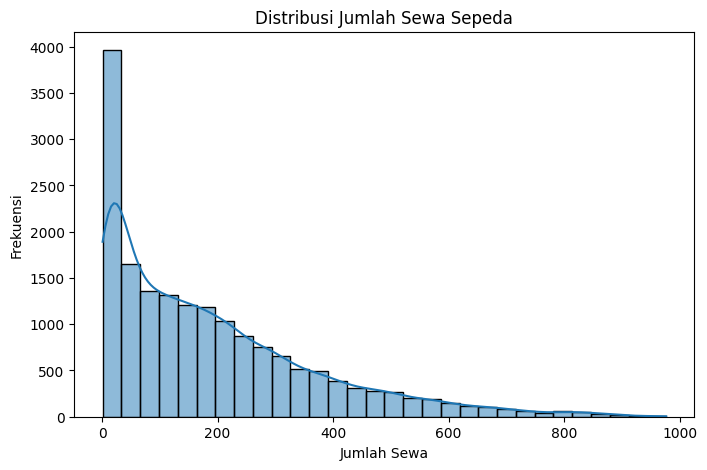

In [11]:
# EDA Univariate (Distribusi satu variabel)
plt.figure(figsize=(8, 5))
sns.histplot(hourly_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Sewa Sepeda')
plt.xlabel('Jumlah Sewa')
plt.ylabel('Frekuensi')
plt.show()


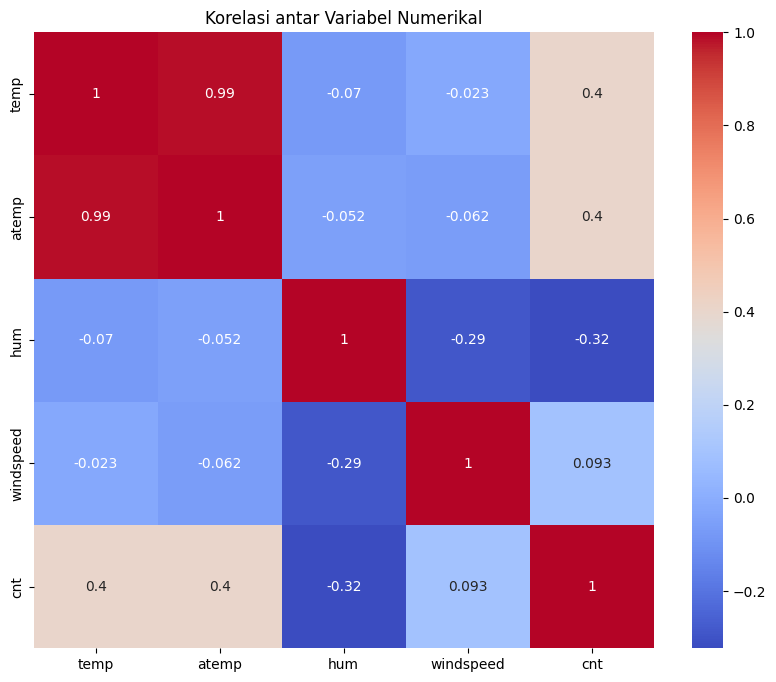

In [12]:
# EDA Numerikal (Korelasi antar angka)
plt.figure(figsize=(10, 8))
sns.heatmap(hourly_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Variabel Numerikal')
plt.show()


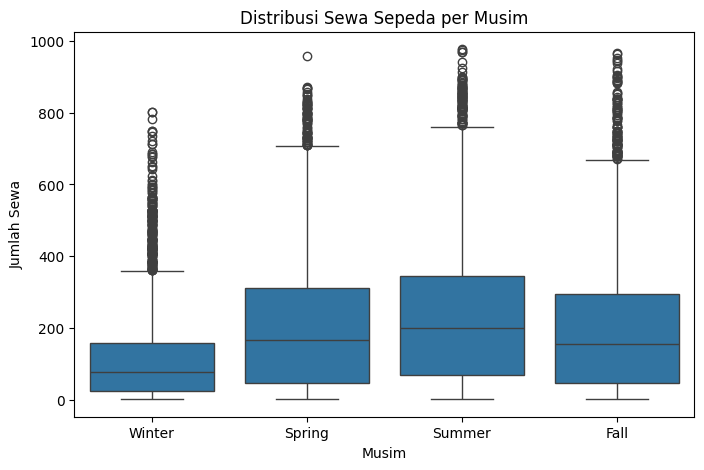

In [13]:
# EDA Kategorikal (Perbandingan antar kategori)
plt.figure(figsize=(8, 5))
sns.boxplot(x='season_label', y='cnt', data=hourly_df)
plt.title('Distribusi Sewa Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')
plt.show()


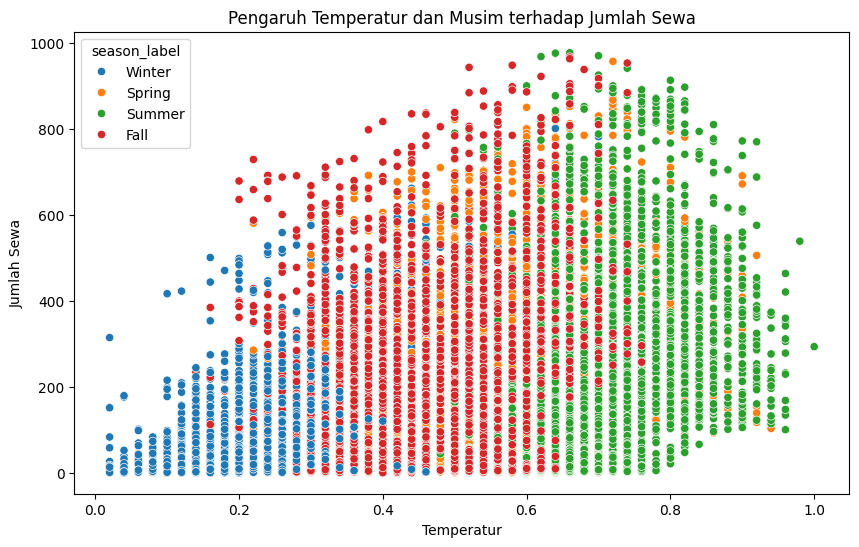

In [14]:
# EDA Multivariate (Gabungan dua atau lebih variabel)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='season_label', data=hourly_df)
plt.title('Pengaruh Temperatur dan Musim terhadap Jumlah Sewa')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Sewa')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-6-4012452649.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hourly_df, x='hr', y='cnt', ci=None)


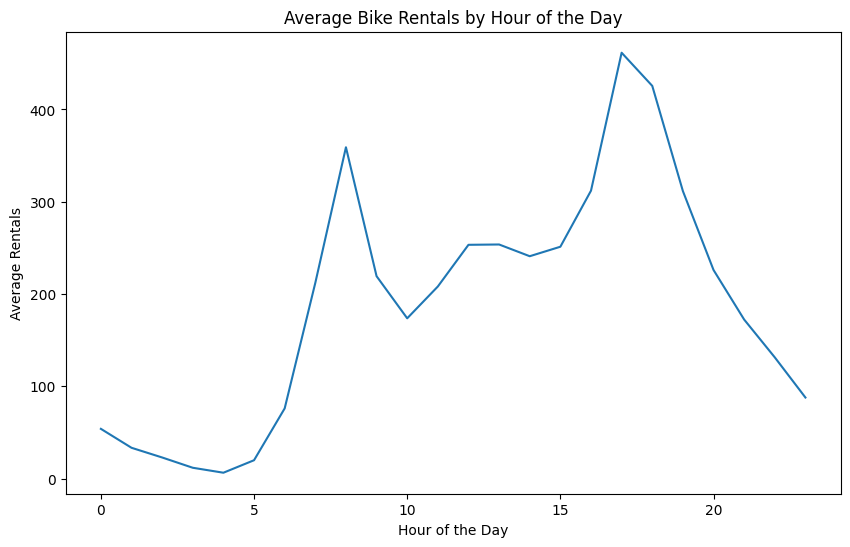

In [6]:
# Rentals by hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_df, x='hr', y='cnt', ci=None)
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.show()


### Pertanyaan 2:

/tmp/ipython-input-7-1517179488.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hourly_df, x='season_label', y='cnt', estimator=sum, ci=None)


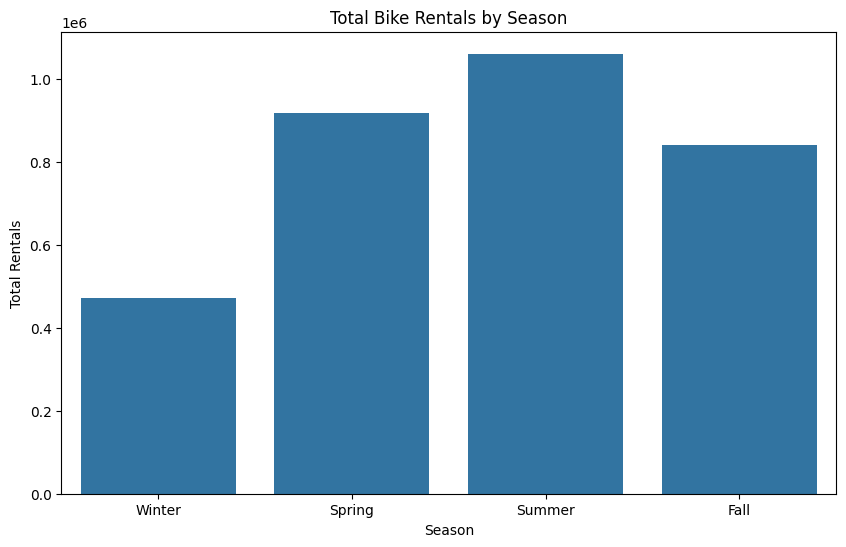

In [7]:
# Define a dictionary to map season numbers to names
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}

# Apply mapping to the 'season' column
hourly_df['season_label'] = hourly_df['season'].map(season_labels)

# Create the plot with updated labels
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_df, x='season_label', y='cnt', estimator=sum, ci=None)
plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()


**Insight:**
- Jam sibuk (pukul 8 pagi dan 5 sore) memiliki jumlah penyewaan sepeda tertinggi.
- Musim 2 (Musim Semi) dan Musim 3 (Musim Panas) mencatat aktivitas penyewaan sepeda tertinggi, sedangkan Musim 1 (Musim Dingin) dan Musim 4 (Musim Gugur) memiliki penggunaan yang lebih rendah.

## Analisis Lanjutan (Opsional)

In [8]:
# Define reference date (max date in dataset + 1)
reference_date = hourly_df['dteday'].max() + pd.Timedelta(days=1)

# RFM metrics
rfm_df = hourly_df.groupby('casual').agg({
    'dteday': lambda x: (reference_date - x.max()).days,  # Recency
    'hr': 'count',  # Frequency (hourly transactions)
    'cnt': 'sum'  # Monetary (total bike counts)
}).reset_index()

rfm_df.columns = ['User', 'Recency', 'Frequency', 'Monetary']

# RFM Scores
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine scores
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

print(rfm_df)


     User  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Segment
0       0        1       1581     20920       4       4       4         444
1       1        2       1082     27181       4       4       4         444
2       2        1        798     29764       4       4       4         444
3       3        1        697     38656       4       4       4         444
4       4        1        561     37314       4       4       4         444
..    ...      ...        ...       ...     ...     ...     ...         ...
317   356      227          1       672       1       1       1         111
318   357      290          1       679       1       1       1         111
319   361      227          1       730       1       1       1         111
320   362       87          1       743       2       1       1         211
321   367      290          1       685       1       1       1         111

[322 rows x 8 columns]


**Insight:**
- Hasil analisis lanjutan menunjukkan bahwa ada pelanggan yang mempunyai skor tinggi (444), untuk retain pelanggan seperti ini bisa diberikan program loyalitas
- Ada juga pelanggan dengan skor rendah (111), pelanggan ini bisa menjadi target untuk reengagement dan di explor lebih jauh ada kendala apa untuk dibantu agar loyalitasnya meningkat.

## Conclusion

**Conclusion:**

- Identifikasi jam sibuk, yaitu jam berangkat dan pulang kantor. Hal ini menunjukkan pola kebutuhan pengguna yang sangat terikat dengan aktivitas harian mereka, seperti pergi dan pulang kerja. Perusahaan bisa melakukan strategi harga diluar dan di dalam jam sibuk, juga bisa melakukan perencanaan ulang inventori sepeda.
- Hasil analisis data menunjukkan bahwa musim mempengaruhi perilaku sewa sepeda oleh pelanggan. Musim semi dan musim panas mempunyai tingkat tertinggi. Data ini bisa digunakan oleh perusahaan melakukan persiapan di musim sebelumnya agar sewa yang dilakukan di peak season bisa optimal. Misal, seluruh sepeda dicek ulang dari kerusakan dan kendala untuk mamaksimalkan jumlah sepeda yang bisa di sewa.